# Build `gold_prob` 

In [ ]:
import pandas as pd

df = pd.read_csv("/home/a_zahedzadeh/self-explaination-thesis/results/models/evaluation/qwen_1.7B/en_with_goldprob/cohere/eval_cohere_r_command_20_with_goldprob.csv")

import numpy as np

df[~np.isclose(df['gold_prob_exp'], df['prob_exp'], rtol=1e-5, atol=1e-8)]


,index,question,options,gold,masked_explanation,pred_noexp,prob_noexp,pred_exp,prob_exp,is_correct_noexp,is_correct_exp,sufficiency,usefulness,probs_noexp,probs_exp,similarity_with_base,similarity_with_base_clean,gold_prob_noexp,gold_prob_exp,delta_gold_prob
5,5,Which land form is the result of the construct...,"['valleys carved by a moving glacier', 'piles ...",B,Glaciers erode and shape valleys.,A,0.874830,A,0.992384,False,False,False,False,[0.87482995 0.09238666 0.02999356 0.00278984],[0.99238354 0.00190154 0.00456155 0.00115334],0.768759,0.768759,0.092387,0.001902,-0.090485
13,13,The male insects in a population are treated t...,"['No, because the insects would still mate.', ...",C,Sterile males cannot reproduce.,C,0.521125,A,0.907407,True,False,False,False,[0.45989153 0.00312303 0.5211254 0.01586005],[0.90740734 0.00290505 0.08489802 0.00478962],0.535784,0.535784,0.521125,0.084898,-0.436227
17,17,"One evening as it is getting dark, Alex sits o...","[""The sun's light is reflected by the clouds.""...",D,Earth's rotation causes apparent sun motion.,D,0.548628,C,0.458381,True,False,False,False,[0.33146235 0.02419937 0.09571037 0.5486279 ],[0.13132845 0.00577017 0.4583813 0.40452006],0.765162,0.765161,0.548628,0.404520,-0.144108
18,18,A toothpaste commercial states that a brand of...,"['has a pleasant flavor.', 'is recommended by ...",C,High fluoride for healthy teeth.,C,0.518818,A,0.346716,True,False,False,False,[0.16909483 0.27879024 0.51881814 0.03329675],[0.3467165 0.3467165 0.23829454 0.06827252],0.622308,0.622308,0.518818,0.238295,-0.280524
26,26,Stars are often classified by their apparent b...,"['visible color', 'composition', 'surface text...",C,[MASK] is an external characteristic.,A,0.597986,A,0.853967,False,False,False,False,[0.5979862 0.02637651 0.09206308 0.28357422],[0.8539673 0.00652012 0.10199185 0.03752071],0.642888,0.507913,0.092063,0.101992,0.009929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2560,Human actions affect the environment. Which hu...,"['burning a forest', 'burning fossil fuels', '...",C,"Localized impact, minimal spread.",A,0.639412,A,0.448999,False,False,False,False,[0.6394115 0.09882601 0.09882601 0.16293652],[0.44899863 0.05341617 0.39779076 0.09979455],0.583276,0.622765,0.098826,0.397791,0.298965
2563,2563,The Sun is approximately 1.5 x 10^8 km from Ea...,"['2.0 light-seconds', '0.5 light-seconds', '2....",D,Converting and dividing yields 0.5.,A,0.919174,B,0.960305,False,False,False,False,[0.9191741 0.03145241 0.02775665 0.0216169 ],[0.03184882 0.96030456 0.0029624 0.00488418],0.500835,0.529377,0.021617,0.004884,-0.016733
2564,2564,"In many tropical areas, mosquitoes may carry a...","['predator-prey', 'competition for resources',...",C,Mosquitoes transmit parasites to humans.,A,0.724527,A,0.884850,False,False,False,False,[0.7245274 0.18247502 0.04649877 0.04649877],[0.88484955 0.02346558 0.08190294 0.00978191],0.718156,0.718156,0.046499,0.081903,0.035404
2575,2575,A microscope magnifies an object with 50x magn...,"['100 cm', '25 cm', '2.5 cm', '0.01 cm']",D,0.5 cm divided by 50 magnification.,C,0.838375,C,0.958818,False,False,False,False,[0.05359552 0.06073168 0.838375 0.04729788],[0.01989962 0.01502102 0.9588176 0.00626169],0.777579,0.775327,0.047298,0.006262,-0.041036


In [3]:
import os
import pandas as pd
import numpy as np

def parse_probs(val):
    if isinstance(val, str):
        return np.fromstring(val.strip("[]"), sep=" ")
    else:
        return np.array(val)

def get_gold_prob(row, probs_col):
    option_letters = ["A", "B", "C", "D"]
    gold_idx = option_letters.index(row["gold"])
    arr = parse_probs(row[probs_col])
    return arr[gold_idx]

def process_csv(file_path, out_dir):
    df = pd.read_csv(file_path)

    # اضافه کردن ستون‌ها
    df["gold_prob_noexp"] = df.apply(lambda r: get_gold_prob(r, "probs_noexp"), axis=1)
    df["gold_prob_exp"]   = df.apply(lambda r: get_gold_prob(r, "probs_exp"), axis=1)
    df["delta_gold_prob"] = df["gold_prob_exp"] - df["gold_prob_noexp"]

    # ذخیره در پوشه جدید (out_dir)
    os.makedirs(out_dir, exist_ok=True)
    base_name = os.path.basename(file_path)
    out_path = os.path.join(out_dir, base_name.replace(".csv", "_with_goldprob.csv"))
    df.to_csv(out_path, index=False)
    print(f"✅ ذخیره شد: {out_path}")

def process_all(root_dir, out_root="processed_results"):
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(subdir, file)
                # مسیر خروجی آینه‌ای (mirror) درست کن
                rel_path = os.path.relpath(subdir, root_dir)
                out_dir = os.path.join(out_root, rel_path)
                process_csv(file_path, out_dir)

# اجرای کلی
process_all("/home/a_zahedzadeh/self-explaination-thesis/results/models/evaluation/qwen_1.7B/en", out_root="en_with_goldprob")


✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_40_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_70_with_goldprob.csv


✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_50_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_60_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_10_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_20_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_90_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_0_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_80_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_30_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/mistral/eval_mistral_small_3.1_90_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/mistral/eval_mistral_small_3.1_10_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/mistral/eval_mistral_small_3.1_0_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/mistral/eval_mistral_small_3.1_80_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/mistral/eval_mist

# Metrics_Function

In [2]:
import pandas as pd
import glob
import os

def compute_metrics(folder: str, prefix: str) -> pd.DataFrame:
    """
    Compute accuracy, sufficiency, and similarities for all CSVs in a folder
    that start with the given prefix.
    
    Args:
        folder (str): Path to folder containing eval CSV files.
        prefix (str): Prefix of the filenames (e.g. 'eval_cohere_r_command_').
        
    Returns:
        pd.DataFrame: Summary table of metrics across versions.
    """
    files = sorted(glob.glob(os.path.join(folder, f"{prefix}*.csv")))
    results = []

    for f in files:
        print(f)
        version = os.path.splitext(os.path.basename(f))[0].split("_")[-3]
        df = pd.read_csv(f)

        # Accuracy with explanation
        acc_exp = df["is_correct_exp"].mean()

        # Accuracy without explanation (baseline)
        acc_noexp = df["is_correct_noexp"].mean() if "is_correct_noexp" in df else None

        # Sufficiency (mean prob of correct answer given explanation)
        suff = df["gold_prob_exp"].mean()

        # Similarities (may not exist in baseline)
        sim = df["similarity_with_base"].mean() if "similarity_with_base" in df else None
        sim_clean = df["similarity_with_base_clean"].mean() if "similarity_with_base_clean" in df else None

        results.append({
            "version": version,
            "accuracy_exp": acc_exp,
            "accuracy_noexp": acc_noexp,
            "sufficiency": suff,
            "similarity": sim,
            "similarity_clean": sim_clean
        })

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="version").reset_index(drop=True)
    return results_df


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np

# Set publication-ready style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def plot_metrics(results_df, model_name="Model"):
    """
    Create publication-ready plots for accuracy, sufficiency, and similarity metrics.
    
    Args:
        results_df (pd.DataFrame): Results dataframe with version and metric columns
        model_name (str): Name of the model for the title
    """
    results_df["version"] = results_df["version"].astype(int)
    baseline_df = results_df[results_df["version"] == 0]
    other_df = results_df[results_df["version"] != 0].sort_values(by="version", ascending=False)
    plot_df = pd.concat([baseline_df, other_df])
    
    # Define consistent styling
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    x_pos = range(len(plot_df))
    
    # Create figure with publication-ready dimensions
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')
    fig.patch.set_facecolor('white')
    
    # Color scheme for consistency
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    # Plot 1: Accuracy
    axs[0].plot(x_pos, plot_df["accuracy_exp"], marker="o", linewidth=2.5, 
                markersize=8, color=colors[0], label="With Explanation", zorder=3)
    if "accuracy_noexp" in plot_df.columns:
        axs[0].plot(x_pos, plot_df["accuracy_noexp"], marker="s", linewidth=2.5, 
                    markersize=8, linestyle="--", color=colors[1], 
                    label="Without Explanation", zorder=3)
    
    axs[0].set_title("Model Accuracy", fontsize=14, fontweight='bold', pad=15)
    axs[0].set_ylabel("Accuracy Score", fontsize=12)
    axs[0].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs[0].legend(frameon=True, fancybox=True, shadow=True, loc='best')
    axs[0].set_ylim(bottom=min(plot_df["accuracy_exp"]) * 0.95)
    
    # Plot 2: Sufficiency
    axs[1].plot(x_pos, plot_df["sufficiency"], marker="^", linewidth=2.5, 
                markersize=8, color=colors[2], zorder=3)
    axs[1].set_title("Explanation Sufficiency", fontsize=14, fontweight='bold', pad=15)
    axs[1].set_ylabel("Sufficiency Score", fontsize=12)
    axs[1].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs[1].set_ylim(bottom=min(plot_df["sufficiency"]) * 0.95)
    
    # Plot 3: Similarity
    if "similarity" in plot_df.columns:
        axs[2].plot(x_pos, plot_df["similarity"], marker="o", linewidth=2.5, 
                    markersize=8, color='#C73E1D', label="Original", zorder=3)
    if "similarity_clean" in plot_df.columns:
        axs[2].plot(x_pos, plot_df["similarity_clean"], marker="^", linewidth=2.5, 
                    markersize=8, color='#7209B7', label="Cleaned", zorder=3)
    
    axs[2].set_title("Output Similarity", fontsize=14, fontweight='bold', pad=15)
    axs[2].set_ylabel("Similarity Score", fontsize=12)
    axs[2].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs[2].legend(frameon=True, fancybox=True, shadow=True, loc='best')
    if "similarity" in plot_df.columns:
        axs[2].set_ylim(bottom=min(plot_df["similarity"]) * 0.95)
    
    # Common styling for all subplots
    for i, ax in enumerate(axs):
        ax.set_xticks(x_pos)
        ax.set_xticklabels(display_labels, rotation=45, ha='right', fontsize=11)
        ax.set_xlabel("Constraint Level", fontsize=12, fontweight='bold')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.8)
        ax.spines['bottom'].set_linewidth(0.8)
        
        # Add subtle background shading for baseline
        ax.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=1)
    
    # Main title
    fig.suptitle(f"Performance Metrics Evaluation: {model_name}", 
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.15)
    plt.show()


def plot_multi_models(dfs: dict, metric: str, title: str, save_path=None):
    """
    Create publication-ready multi-model comparison plot.
    
    Args:
        dfs (dict): Dictionary of model names and their dataframes
        metric (str): Metric column name to plot
        title (str): Plot title
        save_path (str, optional): Path to save the figure
    """
    # Create publication-ready figure
    plt.figure(figsize=(12, 7), facecolor='white')
    
    # Enhanced color palette for multiple models
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
              '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    # Line styles for variety
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    
    for i, (model_name, df) in enumerate(dfs.items()):
        df = df.copy()
        df["version"] = df["version"].astype(int)
        baseline_df = df[df["version"] == 0]
        other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
        plot_df = pd.concat([baseline_df, other_df])
        
        x_pos = range(len(plot_df))
        
        plt.plot(x_pos, plot_df[metric], 
                marker=markers[i % len(markers)], 
                linewidth=3, 
                markersize=9,
                color=colors[i % len(colors)],
                linestyle=line_styles[i % len(line_styles)],
                label=model_name,
                zorder=3)
    
    # Styling
    plt.xticks(x_pos, display_labels, rotation=45, ha='right', fontsize=12)
    plt.xlabel("Constraint Level", fontsize=14, fontweight='bold')
    plt.ylabel(f"{metric.replace('_', ' ').title()} Score", fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Enhanced legend
    plt.legend(frameon=True, fancybox=True, shadow=True, 
              bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
    
    # Grid and styling
    plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    
    # Highlight baseline region
    plt.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=1)
    
    # Removed the bottom constraint level annotation text
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12, right=0.85)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    plt.show()


def plot_heatmap_comparison(dfs: dict, metrics: list, title: str = "Model Performance Heatmap"):
    """
    Create a heatmap comparison of multiple metrics across models and constraint levels.
    
    Args:
        dfs (dict): Dictionary of model names and their dataframes
        metrics (list): List of metric column names
        title (str): Heatmap title
    """
    # Prepare data for heatmap
    heatmap_data = []
    model_names = []
    
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    
    for model_name, df in dfs.items():
        df = df.copy()
        df["version"] = df["version"].astype(int)
        baseline_df = df[df["version"] == 0]
        other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
        plot_df = pd.concat([baseline_df, other_df])
        
        for metric in metrics:
            if metric in plot_df.columns:
                heatmap_data.append(plot_df[metric].values)
                model_names.append(f"{model_name} - {metric.replace('_', ' ').title()}")
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(12, len(model_names) * 0.6), facecolor='white')
    
    heatmap_array = np.array(heatmap_data)
    im = ax.imshow(heatmap_array, cmap='RdYlGn', aspect='auto', interpolation='nearest')
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('Performance Score', fontsize=12, fontweight='bold')
    
    # Labels
    ax.set_xticks(range(len(display_labels)))
    ax.set_xticklabels(display_labels, rotation=45, ha='right')
    ax.set_yticks(range(len(model_names)))
    ax.set_yticklabels(model_names, fontsize=10)
    
    ax.set_xlabel("Constraint Level", fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Add value annotations
    for i in range(len(model_names)):
        for j in range(len(display_labels)):
            text = ax.text(j, i, f'{heatmap_array[i, j]:.3f}',
                          ha="center", va="center", color="black", fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## Claude

In [4]:
claude_df = compute_metrics("claude", "eval_claude_3_haiku_")
claude_df

claude/eval_claude_3_haiku_0_with_goldprob.csv
claude/eval_claude_3_haiku_10_with_goldprob.csv
claude/eval_claude_3_haiku_20_with_goldprob.csv
claude/eval_claude_3_haiku_30_with_goldprob.csv
claude/eval_claude_3_haiku_40_with_goldprob.csv
claude/eval_claude_3_haiku_50_with_goldprob.csv
claude/eval_claude_3_haiku_60_with_goldprob.csv
claude/eval_claude_3_haiku_70_with_goldprob.csv
claude/eval_claude_3_haiku_80_with_goldprob.csv
claude/eval_claude_3_haiku_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean
0,0,0.862069,0.71174,0.830578,NaN,NaN
1,10,0.828749,0.71174,0.781794,0.661400,0.669648
2,20,0.831461,0.71174,0.794030,0.754894,0.762059
3,30,0.848508,0.71174,0.804921,0.805928,0.812099
4,40,0.846959,0.71174,0.812921,0.831252,0.837705
5,50,0.852383,0.71174,0.817342,0.841518,0.848386
6,60,0.854707,0.71174,0.820167,0.850156,0.857235
7,70,0.855870,0.71174,0.821610,0.857712,0.864955
8,80,0.853158,0.71174,0.821201,0.865163,0.872693
9,90,0.857032,0.71174,0.824559,0.872764,0.880185


## GPT

In [5]:
gpt_df = compute_metrics("gpt_4o_mini", "eval_gpt_4o_mini_")
gpt_df

gpt_4o_mini/eval_gpt_4o_mini_0_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_10_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_20_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_30_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_40_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_50_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_60_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_70_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_80_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean
0,0,0.893452,0.71174,0.861808,NaN,NaN
1,10,0.832623,0.71174,0.784190,0.615903,0.623687
2,20,0.852383,0.71174,0.805033,0.702027,0.711257
3,30,0.862844,0.71174,0.819203,0.762681,0.772458
4,40,0.873692,0.71174,0.831729,0.806133,0.815740
5,50,0.876404,0.71174,0.837007,0.835769,0.845480
6,60,0.880279,0.71174,0.845261,0.857652,0.867835
7,70,0.890740,0.71174,0.853462,0.875391,0.886075
8,80,0.893065,0.71174,0.858174,0.889263,0.899271
9,90,0.892290,0.71174,0.859008,0.898990,0.909736


## Cohere

In [6]:
cohere_df = compute_metrics("cohere", "eval_cohere_r_command_")
cohere_df

cohere/eval_cohere_r_command_0_with_goldprob.csv
cohere/eval_cohere_r_command_10_with_goldprob.csv
cohere/eval_cohere_r_command_20_with_goldprob.csv
cohere/eval_cohere_r_command_30_with_goldprob.csv
cohere/eval_cohere_r_command_40_with_goldprob.csv
cohere/eval_cohere_r_command_50_with_goldprob.csv
cohere/eval_cohere_r_command_60_with_goldprob.csv
cohere/eval_cohere_r_command_70_with_goldprob.csv
cohere/eval_cohere_r_command_80_with_goldprob.csv
cohere/eval_cohere_r_command_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean
0,0,0.850058,0.71174,0.818158,NaN,NaN
1,10,0.795816,0.71174,0.745721,0.589759,0.593725
2,20,0.807439,0.71174,0.760840,0.682581,0.684795
3,30,0.811313,0.71174,0.769167,0.722988,0.726150
4,40,0.812863,0.71174,0.772007,0.751572,0.755322
5,50,0.816738,0.71174,0.776284,0.775333,0.779007
6,60,0.818287,0.71174,0.780331,0.794160,0.798540
7,70,0.825262,0.71174,0.786419,0.811670,0.816446
8,80,0.830686,0.71174,0.791381,0.825693,0.830384
9,90,0.831461,0.71174,0.794786,0.837877,0.842754


## LLama

In [7]:
llama_df = compute_metrics("llama", "eval_llama_4_maverik_")
llama_df

llama/eval_llama_4_maverik_0_with_goldprob.csv
llama/eval_llama_4_maverik_10_with_goldprob.csv
llama/eval_llama_4_maverik_20_with_goldprob.csv
llama/eval_llama_4_maverik_30_with_goldprob.csv
llama/eval_llama_4_maverik_40_with_goldprob.csv
llama/eval_llama_4_maverik_50_with_goldprob.csv
llama/eval_llama_4_maverik_60_with_goldprob.csv
llama/eval_llama_4_maverik_70_with_goldprob.csv
llama/eval_llama_4_maverik_80_with_goldprob.csv
llama/eval_llama_4_maverik_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean
0,0,0.918636,0.712515,0.881673,NaN,NaN
1,10,0.831848,0.712515,0.776905,0.597881,0.604056
2,20,0.848508,0.712515,0.804218,0.694098,0.704760
3,30,0.859744,0.712515,0.819334,0.748862,0.760657
4,40,0.877567,0.712515,0.832677,0.783669,0.796235
5,50,0.884153,0.712515,0.840554,0.805946,0.818998
6,60,0.891902,0.712515,0.847035,0.823152,0.836979
7,70,0.898876,0.712515,0.855522,0.836293,0.850958
8,80,0.899651,0.712515,0.858776,0.846000,0.860623
9,90,0.900814,0.712515,0.863806,0.855688,0.871208


## Deepseek

In [8]:
deepseek_df = compute_metrics("deepseek", "eval_deepseek_v3.1_")
deepseek_df

deepseek/eval_deepseek_v3.1_0_with_goldprob.csv
deepseek/eval_deepseek_v3.1_10_with_goldprob.csv
deepseek/eval_deepseek_v3.1_20_with_goldprob.csv
deepseek/eval_deepseek_v3.1_30_with_goldprob.csv
deepseek/eval_deepseek_v3.1_40_with_goldprob.csv
deepseek/eval_deepseek_v3.1_50_with_goldprob.csv
deepseek/eval_deepseek_v3.1_60_with_goldprob.csv
deepseek/eval_deepseek_v3.1_70_with_goldprob.csv
deepseek/eval_deepseek_v3.1_80_with_goldprob.csv
deepseek/eval_deepseek_v3.1_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean
0,0,0.907400,0.71174,0.873260,NaN,NaN
1,10,0.841147,0.71174,0.786842,0.597951,0.607101
2,20,0.862069,0.71174,0.808420,0.665568,0.677204
3,30,0.869430,0.71174,0.821310,0.710050,0.721974
4,40,0.883766,0.71174,0.832515,0.742446,0.755558
5,50,0.886478,0.71174,0.839502,0.765120,0.778337
6,60,0.889578,0.71174,0.844276,0.784053,0.797486
7,70,0.896939,0.71174,0.852909,0.798638,0.811979
8,80,0.898102,0.71174,0.853813,0.811059,0.825409
9,90,0.901201,0.71174,0.859711,0.827297,0.840714


## Gemini

In [9]:
gemini_df = compute_metrics("gemini", "eval_gemini_2.0_flash_")
gemini_df

gemini/eval_gemini_2.0_flash_0_with_goldprob.csv
gemini/eval_gemini_2.0_flash_10_with_goldprob.csv
gemini/eval_gemini_2.0_flash_20_with_goldprob.csv
gemini/eval_gemini_2.0_flash_30_with_goldprob.csv
gemini/eval_gemini_2.0_flash_40_with_goldprob.csv
gemini/eval_gemini_2.0_flash_50_with_goldprob.csv
gemini/eval_gemini_2.0_flash_60_with_goldprob.csv
gemini/eval_gemini_2.0_flash_70_with_goldprob.csv
gemini/eval_gemini_2.0_flash_80_with_goldprob.csv
gemini/eval_gemini_2.0_flash_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean
0,0,0.897714,0.71174,0.857499,NaN,NaN
1,10,0.822937,0.71174,0.777981,0.642088,0.647249
2,20,0.855482,0.71174,0.812718,0.738644,0.744572
3,30,0.876792,0.71174,0.829868,0.792207,0.798056
4,40,0.887253,0.71174,0.844227,0.825845,0.831884
5,50,0.887640,0.71174,0.849891,0.848825,0.854730
6,60,0.888415,0.71174,0.852917,0.862534,0.868196
7,70,0.895777,0.71174,0.855929,0.872262,0.877988
8,80,0.901976,0.71174,0.861140,0.878374,0.884315
9,90,0.902363,0.71174,0.864358,0.884798,0.890757


## Mistral

In [10]:
mistral_df = compute_metrics("mistral", "eval_mistral_small_3.1_")
mistral_df

mistral/eval_mistral_small_3.1_0_with_goldprob.csv
mistral/eval_mistral_small_3.1_10_with_goldprob.csv
mistral/eval_mistral_small_3.1_20_with_goldprob.csv
mistral/eval_mistral_small_3.1_30_with_goldprob.csv
mistral/eval_mistral_small_3.1_40_with_goldprob.csv
mistral/eval_mistral_small_3.1_50_with_goldprob.csv
mistral/eval_mistral_small_3.1_60_with_goldprob.csv
mistral/eval_mistral_small_3.1_70_with_goldprob.csv
mistral/eval_mistral_small_3.1_80_with_goldprob.csv
mistral/eval_mistral_small_3.1_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean
0,0,0.900039,0.71174,0.861861,NaN,NaN
1,10,0.813251,0.71174,0.763708,0.596492,0.606380
2,20,0.830686,0.71174,0.787167,0.669407,0.683690
3,30,0.845021,0.71174,0.793211,0.711986,0.728163
4,40,0.857807,0.71174,0.807604,0.747910,0.764041
5,50,0.849283,0.71174,0.809253,0.772484,0.790051
6,60,0.861682,0.71174,0.818422,0.791830,0.809810
7,70,0.865556,0.71174,0.823885,0.805617,0.824267
8,80,0.866718,0.71174,0.824152,0.815906,0.834726
9,90,0.864394,0.71174,0.826085,0.828148,0.847396


# Multi_Models

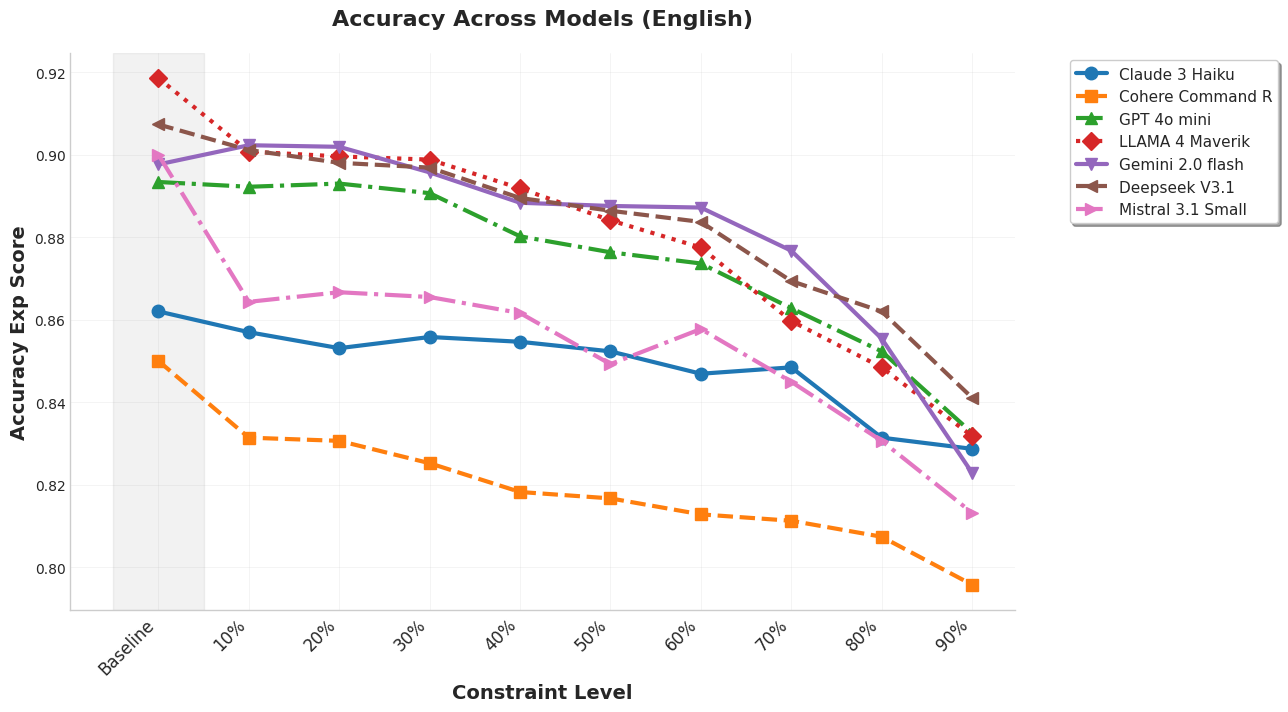

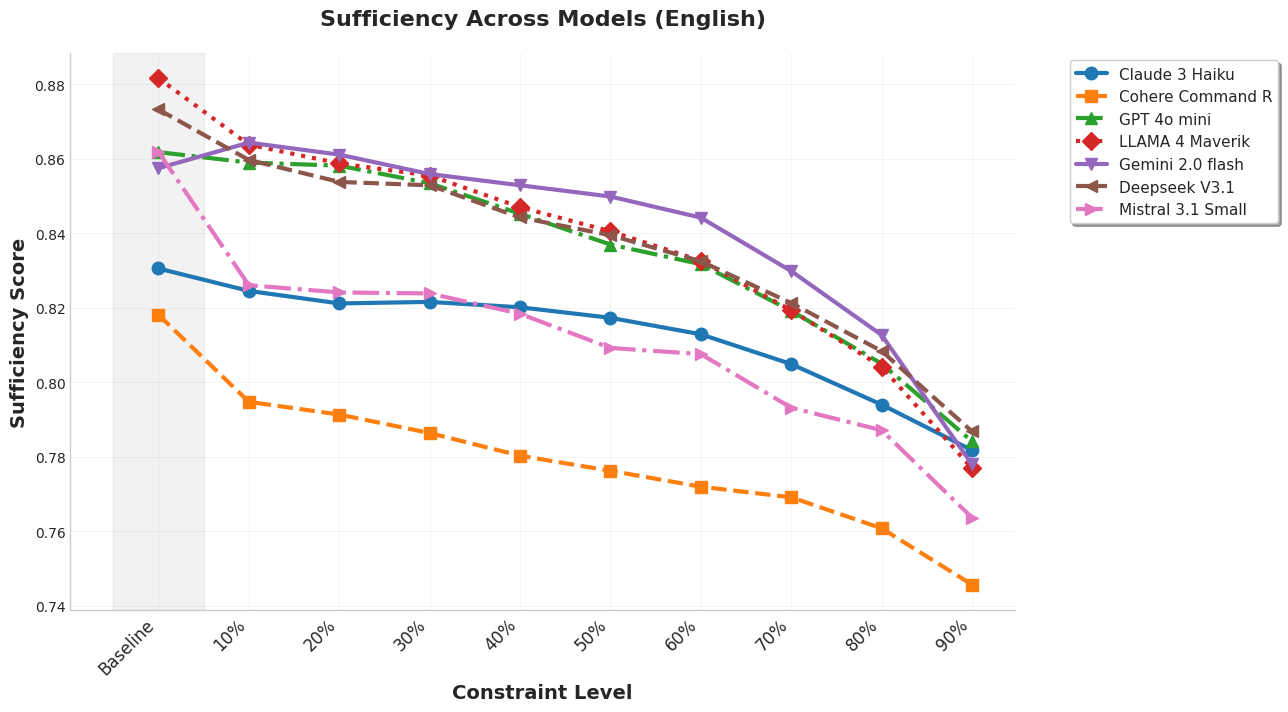

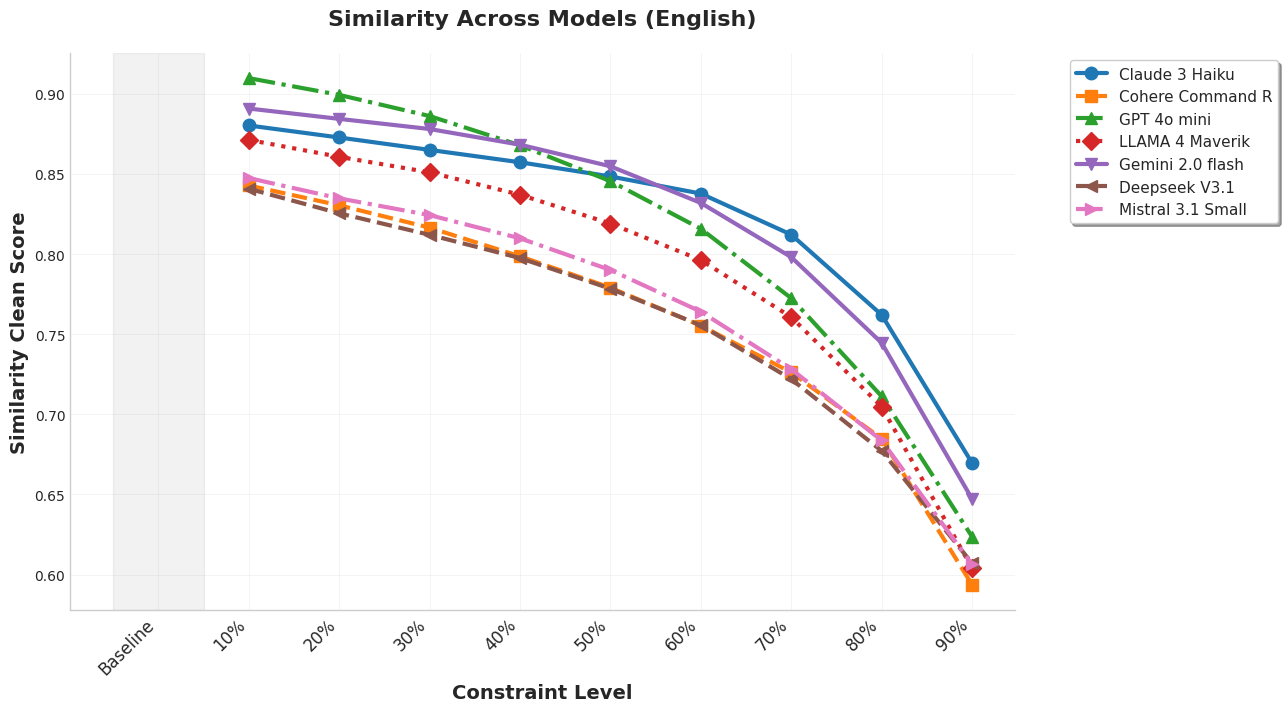

In [11]:
# دیکشنری از مدل‌ها
dfs = {
    "Claude 3 Haiku": claude_df,
    "Cohere Command R": cohere_df,
    "GPT 4o mini": gpt_df,
    "LLAMA 4 Maverik": llama_df,
    "Gemini 2.0 flash": gemini_df,
    "Deepseek V3.1": deepseek_df,
    "Mistral 3.1 Small": mistral_df,
}

# Accuracy
plot_multi_models(dfs, "accuracy_exp", "Accuracy Across Models (English)")

# Sufficiency
plot_multi_models(dfs, "sufficiency", "Sufficiency Across Models (English)")

# Similarity Clean
plot_multi_models(dfs, "similarity_clean", "Similarity Across Models (English)")

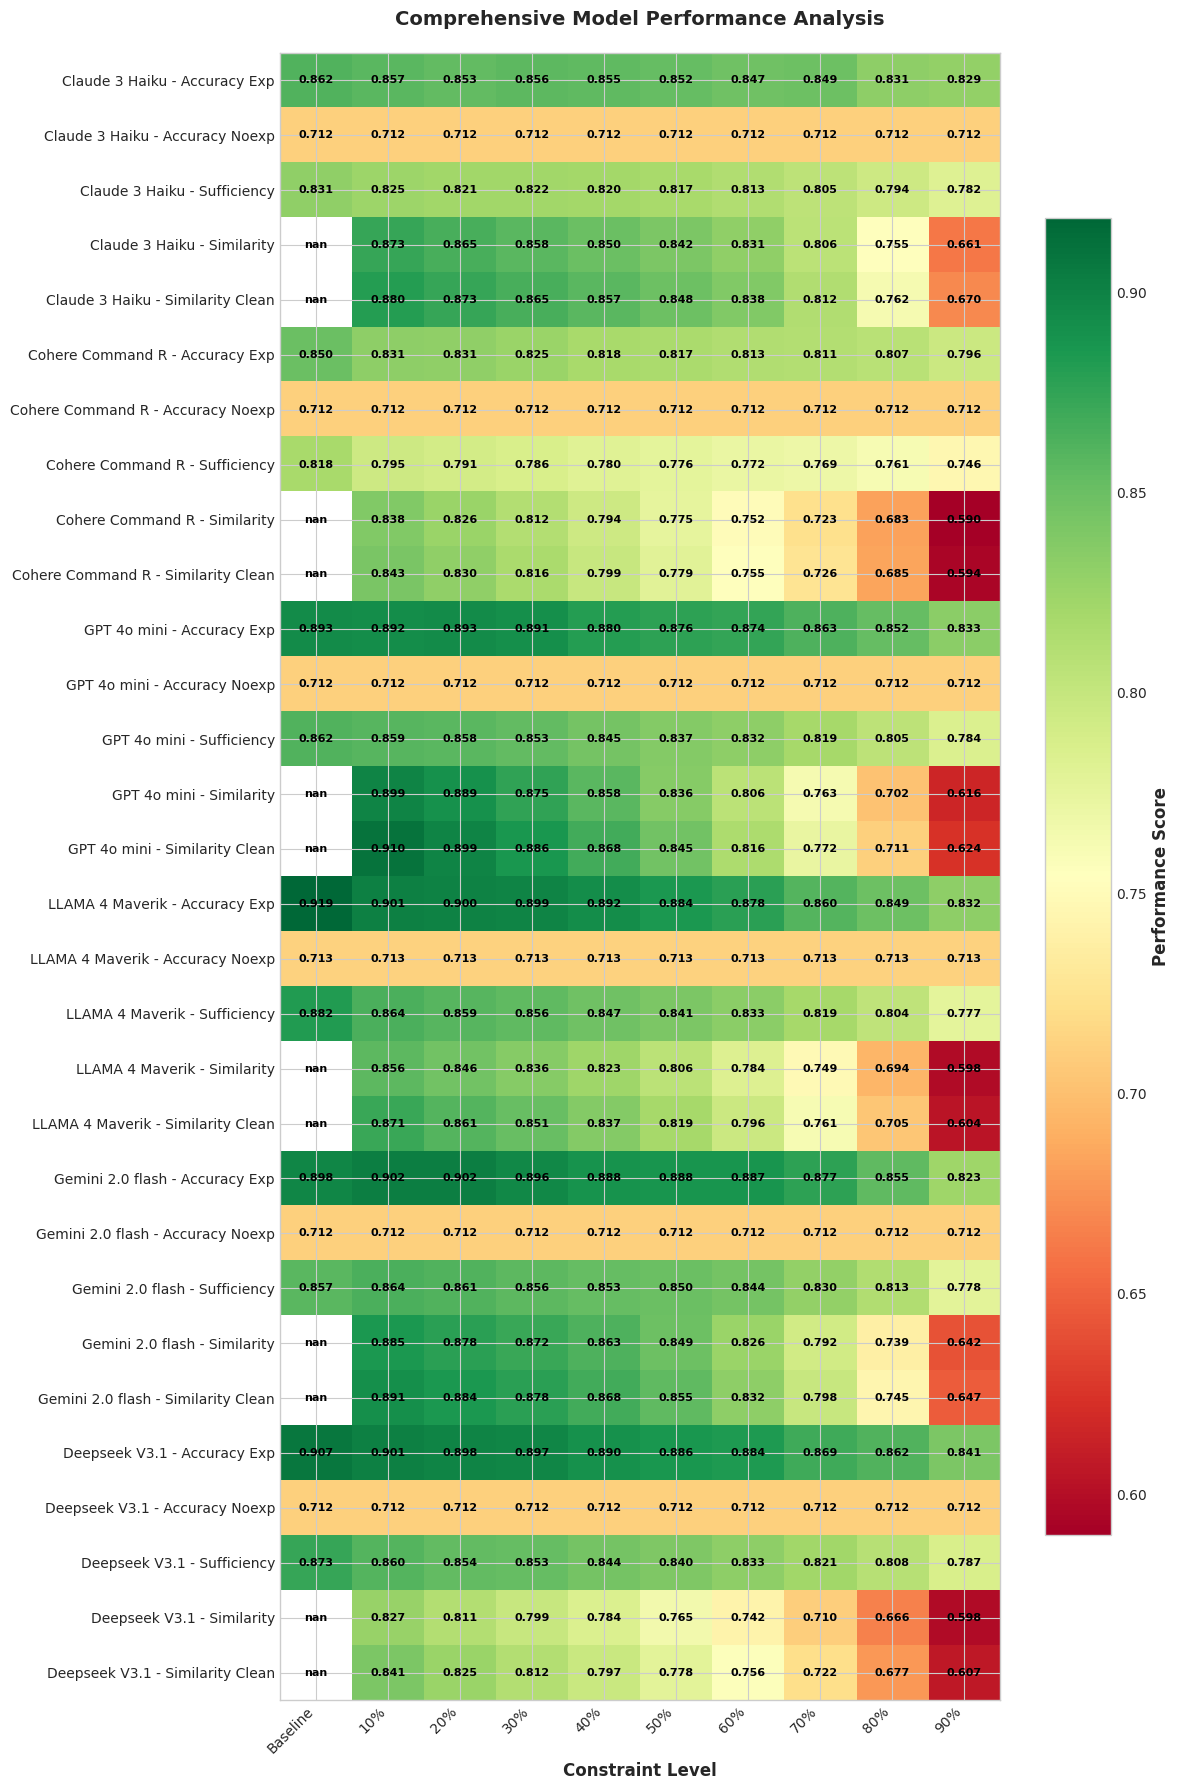

In [16]:
# Example 3: All available metrics
all_metrics = ["accuracy_exp", "accuracy_noexp", "sufficiency", "similarity", "similarity_clean"]
plot_heatmap_comparison(dfs, all_metrics, 
                       title="Comprehensive Model Performance Analysis")

# Other Visualization

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Set professional style
plt.style.use('default')
sns.set_palette("Set2")

def plot_grouped_comparison(dfs: dict, metrics: list, title: str = "Model Performance Comparison"):
    """
    Create a clean grouped bar chart comparison across models and metrics.
    """
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    
    # Prepare data
    n_models = len(dfs)
    n_metrics = len(metrics)
    
    fig, axes = plt.subplots(1, n_metrics, figsize=(6*n_metrics, 8), facecolor='white')
    if n_metrics == 1:
        axes = [axes]
    
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#2CA02C']
    
    for metric_idx, metric in enumerate(metrics):
        ax = axes[metric_idx]
        
        # Calculate bar positions
        bar_width = 0.8 / n_models
        x_pos = np.arange(len(display_labels))
        
        for model_idx, (model_name, df) in enumerate(dfs.items()):
            df = df.copy()
            df["version"] = df["version"].astype(int)
            baseline_df = df[df["version"] == 0]
            other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
            plot_df = pd.concat([baseline_df, other_df])
            
            if metric in plot_df.columns:
                values = plot_df[metric].values
                bar_positions = x_pos + (model_idx - n_models/2 + 0.5) * bar_width
                
                bars = ax.bar(bar_positions, values, bar_width, 
                             label=model_name, color=colors[model_idx % len(colors)],
                             alpha=0.8, edgecolor='white', linewidth=1)
                
                # Add value labels on bars
                for bar, value in zip(bars, values):
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                           f'{value:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        ax.set_title(f"{metric.replace('_', ' ').title()}", fontsize=14, fontweight='bold', pad=20)
        ax.set_ylabel("Performance Score", fontsize=12)
        ax.set_xlabel("Constraint Level", fontsize=12)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(display_labels, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Highlight baseline
        ax.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=0)
        
        if metric_idx == 0:
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    fig.suptitle(title, fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, right=0.85)
    plt.show()


def plot_radar_comparison(dfs: dict, constraint_level: str = "50%", title: str = "Model Performance Radar"):
    """
    Create a radar chart comparing models at a specific constraint level.
    """
    # Map constraint level to version
    constraint_map = {"Baseline": 0, "10%": 10, "20%": 20, "30%": 30, "40%": 40, 
                     "50%": 50, "60%": 60, "70%": 70, "80%": 80, "90%": 90}
    
    version = constraint_map.get(constraint_level, 50)
    
    # Prepare data for radar chart
    metrics = ["accuracy_exp", "sufficiency", "similarity"]
    metric_labels = ["Accuracy", "Sufficiency", "Similarity"]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'), facecolor='white')
    
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#2CA02C']
    
    for i, (model_name, df) in enumerate(dfs.items()):
        df = df.copy()
        df["version"] = df["version"].astype(int)
        
        # Get data for specific constraint level
        model_data = df[df["version"] == version]
        if model_data.empty:
            continue
            
        values = []
        for metric in metrics:
            if metric in model_data.columns:
                values.append(model_data[metric].iloc[0])
            else:
                values.append(0)
        
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=3, label=model_name, 
                color=colors[i % len(colors)], markersize=8)
        ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_labels, fontsize=12, fontweight='bold')
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=11)
    plt.title(f"{title} at {constraint_level} Constraint Level", 
              fontsize=14, fontweight='bold', pad=30)
    
    plt.tight_layout()
    plt.show()


def plot_performance_trends(dfs: dict, save_path: str = None):
    """
    Create an advanced multi-panel performance trends visualization.
    """
    metrics = ["accuracy_exp", "sufficiency", "similarity"]
    metric_titles = ["Model Accuracy", "Explanation Sufficiency", "Output Similarity"]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='white')
    fig.patch.set_facecolor('white')
    
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    markers = ['o', 's', '^', 'D', 'v', '<']
    
    # Plot individual metrics
    for metric_idx, (metric, metric_title) in enumerate(zip(metrics, metric_titles)):
        if metric_idx < 3:
            row, col = metric_idx // 2, metric_idx % 2
            ax = axes[row, col]
            
            for model_idx, (model_name, df) in enumerate(dfs.items()):
                df = df.copy()
                df["version"] = df["version"].astype(int)
                baseline_df = df[df["version"] == 0]
                other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
                plot_df = pd.concat([baseline_df, other_df])
                
                if metric in plot_df.columns:
                    x_pos = range(len(plot_df))
                    ax.plot(x_pos, plot_df[metric], 
                           marker=markers[model_idx % len(markers)], 
                           linewidth=3, markersize=8,
                           color=colors[model_idx % len(colors)],
                           label=model_name if metric_idx == 0 else "")
            
            ax.set_title(metric_title, fontsize=14, fontweight='bold')
            ax.set_ylabel("Score", fontsize=12)
            ax.set_xlabel("Constraint Level", fontsize=12)
            ax.set_xticks(range(len(display_labels)))
            ax.set_xticklabels(display_labels, rotation=45, ha='right')
            ax.grid(True, alpha=0.3)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            # Highlight baseline
            ax.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=0)
    
    # Combined performance score in the fourth subplot
    ax = axes[1, 1]
    for model_idx, (model_name, df) in enumerate(dfs.items()):
        df = df.copy()
        df["version"] = df["version"].astype(int)
        baseline_df = df[df["version"] == 0]
        other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
        plot_df = pd.concat([baseline_df, other_df])
        
        # Calculate combined score (average of available metrics)
        combined_scores = []
        for _, row in plot_df.iterrows():
            scores = []
            for metric in metrics:
                if metric in plot_df.columns and not pd.isna(row[metric]):
                    scores.append(row[metric])
            combined_scores.append(np.mean(scores) if scores else 0)
        
        x_pos = range(len(plot_df))
        ax.plot(x_pos, combined_scores, 
               marker=markers[model_idx % len(markers)], 
               linewidth=3, markersize=8,
               color=colors[model_idx % len(colors)],
               label=model_name)
    
    ax.set_title("Combined Performance Score", fontsize=14, fontweight='bold')
    ax.set_ylabel("Average Score", fontsize=12)
    ax.set_xlabel("Constraint Level", fontsize=12)
    ax.set_xticks(range(len(display_labels)))
    ax.set_xticklabels(display_labels, rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=0)
    
    # Add legend to the first subplot
    axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    fig.suptitle("Comprehensive Model Performance Analysis", 
                 fontsize=18, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, right=0.85)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    plt.show()


def plot_delta_heatmap(dfs: dict, baseline_metric: str = "accuracy_exp", title: str = "Performance Change from Baseline"):
    """
    Create a heatmap showing performance changes relative to baseline.
    """
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
    
    delta_data = []
    model_names = list(dfs.keys())
    constraint_levels = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    
    for model_name, df in dfs.items():
        df = df.copy()
        df["version"] = df["version"].astype(int)
        
        baseline_value = df[df["version"] == 0][baseline_metric].iloc[0]
        
        model_deltas = []
        for version in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
            constraint_value = df[df["version"] == version][baseline_metric].iloc[0]
            delta = constraint_value - baseline_value
            model_deltas.append(delta)
        
        delta_data.append(model_deltas)
    
    delta_array = np.array(delta_data)
    
    # Create heatmap
    im = ax.imshow(delta_array, cmap='RdBu_r', aspect='auto', vmin=-0.1, vmax=0.1)
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Performance Change from Baseline', fontsize=12, fontweight='bold')
    
    # Labels
    ax.set_xticks(range(len(constraint_levels)))
    ax.set_xticklabels(constraint_levels)
    ax.set_yticks(range(len(model_names)))
    ax.set_yticklabels(model_names, fontsize=12)
    
    ax.set_xlabel("Constraint Level", fontsize=14, fontweight='bold')
    ax.set_ylabel("Models", fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Add value annotations
    for i in range(len(model_names)):
        for j in range(len(constraint_levels)):
            value = delta_array[i, j]
            color = 'white' if abs(value) > 0.05 else 'black'
            ax.text(j, i, f'{value:+.3f}', ha="center", va="center", 
                   color=color, fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# LONG DF 

In [12]:
import pandas as pd

all_dfs = []
for model_name, df in dfs.items():
    # keep only needed columns
    sub = df[["version", "accuracy_exp", "sufficiency", "similarity_clean"]].copy()
    sub["model"] = model_name
    all_dfs.append(sub)

merged_df = pd.concat(all_dfs, ignore_index=True)

merged_df.tail(20)

,version,accuracy_exp,sufficiency,similarity_clean,model
50,0,0.907400,0.873260,NaN,Deepseek V3.1
51,10,0.841147,0.786842,0.607101,Deepseek V3.1
52,20,0.862069,0.808420,0.677204,Deepseek V3.1
53,30,0.869430,0.821310,0.721974,Deepseek V3.1
54,40,0.883766,0.832515,0.755558,Deepseek V3.1
55,50,0.886478,0.839502,0.778337,Deepseek V3.1
56,60,0.889578,0.844276,0.797486,Deepseek V3.1
57,70,0.896939,0.852909,0.811979,Deepseek V3.1
58,80,0.898102,0.853813,0.825409,Deepseek V3.1
59,90,0.901201,0.859711,0.840714,Deepseek V3.1


                  accuracy_exp  sufficiency  similarity_clean
accuracy_exp          1.000000     0.983988          0.634509
sufficiency           0.983988     1.000000          0.749188
similarity_clean      0.634509     0.749188          1.000000


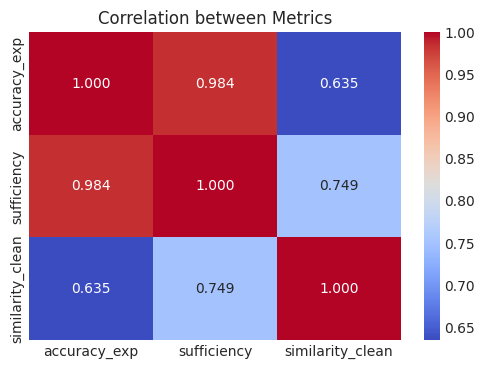

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# محاسبه ماتریس همبستگی
corr = merged_df[["accuracy_exp", "sufficiency", "similarity_clean"]].corr(method="pearson")
print(corr)

# نمایش بصری
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation between Metrics")
plt.show()


In [22]:
df

,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean
0,0,0.900039,0.71174,0.861861,NaN,NaN
1,10,0.813251,0.71174,0.763708,0.596492,0.606380
2,20,0.830686,0.71174,0.787167,0.669407,0.683690
3,30,0.845021,0.71174,0.793211,0.711986,0.728163
4,40,0.857807,0.71174,0.807604,0.747910,0.764041
5,50,0.849283,0.71174,0.809253,0.772484,0.790051
6,60,0.861682,0.71174,0.818422,0.791830,0.809810
7,70,0.865556,0.71174,0.823885,0.805617,0.824267
8,80,0.866718,0.71174,0.824152,0.815906,0.834726
9,90,0.864394,0.71174,0.826085,0.828148,0.847396


In [13]:
merged_wide = (
    merged_df
    .pivot(index="version", columns="model", values=["accuracy_exp", "sufficiency", "similarity_clean"])
)

merged_wide

accuracy_exp                                             \
model   Claude 3 Haiku Cohere Command R Deepseek V3.1 GPT 4o mini   
version                                                             
0             0.862069         0.850058      0.907400    0.893452   
10            0.828749         0.795816      0.841147    0.832623   
20            0.831461         0.807439      0.862069    0.852383   
30            0.848508         0.811313      0.869430    0.862844   
40            0.846959         0.812863      0.883766    0.873692   
50            0.852383         0.816738      0.886478    0.876404   
60            0.854707         0.818287      0.889578    0.880279   
70            0.855870         0.825262      0.896939    0.890740   
80            0.853158         0.830686      0.898102    0.893065   
90            0.857032         0.831461      0.901201    0.892290   

                                                              sufficiency  \
model   Gemini 2.0 flash LLAMA 4 Maverik Mistral 3.1 Small Claude 3 Haiku   
version                                                                     
0               0.897714        0.918636          0.900039       0.830578   
10              0.822937        0.831848          0.813251       0.781794   
20              0.855482        0.848508          0.830686       0.794030   
30              0.876792        0.859744          0.845021       0.804921   
40              0.887253        0.877567          0.857807       0.812921   
50              0.887640        0.884153          0.849283       0.817342   
60              0.888415        0.891902          0.861682       0.820167   
70              0.895777        0.898876          0.865556       0.821610   
80              0.901976        0.899651          0.866718       0.821201   
90              0.902363        0.900814          0.864394       0.824559   

                                        ...                                   \
model   Cohere Command R Deepseek V3.1  ... Gemini 2.0 flash LLAMA 4 Maverik   
version                                 ...                                    
0               0.818158      0.873260  ...         0.857499        0.881673   
10              0.745721      0.786842  ...         0.777981        0.776905   
20              0.760840      0.808420  ...         0.812718        0.804218   
30              0.769167      0.821310  ...         0.829868        0.819334   
40              0.772007      0.832515  ...         0.844227        0.832677   
50              0.776284      0.839502  ...         0.849891        0.840554   
60              0.780331      0.844276  ...         0.852917        0.847035   
70              0.786419      0.852909  ...         0.855929        0.855522   
80              0.791381      0.853813  ...         0.861140        0.858776   
90              0.794786      0.859711  ...         0.864358        0.863806   

                          similarity_clean                                 \
model   Mistral 3.1 Small   Claude 3 Haiku Cohere Command R Deepseek V3.1   
version                                                                     
0                0.861861              NaN              NaN           NaN   
10               0.763708         0.669648         0.593725      0.607101   
20               0.787167         0.762059         0.684795      0.677204   
30               0.793211         0.812099         0.726150      0.721974   
40               0.807604         0.837705         0.755322      0.755558   
50               0.809253         0.848386         0.779007      0.778337   
60               0.818422         0.857235         0.798540      0.797486   
70               0.823885         0.864955         0.816446      0.811979   
80               0.824152         0.872693         0.830384      0.825409   
90               0.826085         0.880185         0.842754      0.840714   

                                                                   

NameError: name 'alizahedzadeh' is not defined

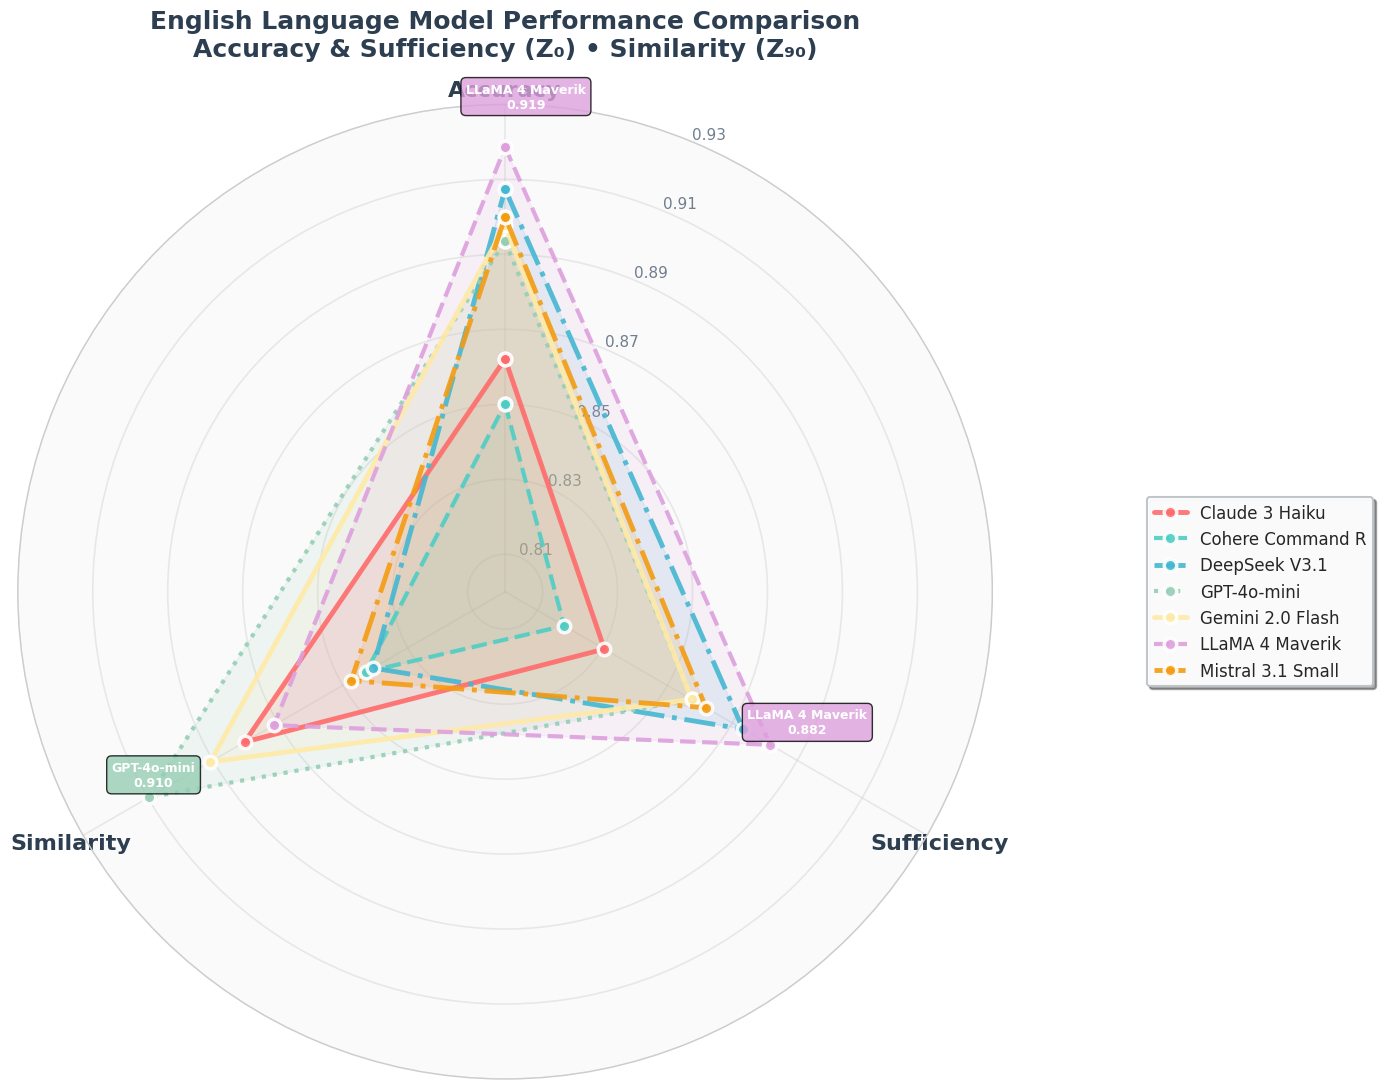

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Circle
import seaborn as sns

# Set style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ==========================================
# English radar data (acc/suff @ Z0, sim @ Z90)
# ==========================================
data_en = {
    "Model": [
        "Claude 3 Haiku",
        "Cohere Command R",
        "DeepSeek V3.1",
        "GPT-4o-mini",
        "Gemini 2.0 Flash",
        "LLaMA 4 Maverik",
        "Mistral 3.1 Small"
    ],
    "Accuracy": [0.8621, 0.8501, 0.9074, 0.8935, 0.8977, 0.9186, 0.9000],
    "Sufficiency": [0.8306, 0.8182, 0.8733, 0.8575, 0.8575, 0.8817, 0.8619],
    "Similarity": [0.8802, 0.8428, 0.8407, 0.9097, 0.8908, 0.8712, 0.8474]
}

df = pd.DataFrame(data_en)

# ==========================================
# Enhanced Radar chart setup
# ==========================================
categories = ["Accuracy", "Sufficiency", "Similarity"]
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Create figure with larger size and better DPI
fig, ax = plt.subplots(figsize=(14, 11), subplot_kw=dict(polar=True), dpi=100)

# Define beautiful color palette for 7 models
colors = [
    '#FF6B6B',  # Coral Red - Claude 3 Haiku
    '#4ECDC4',  # Teal - Cohere Command R
    '#45B7D1',  # Sky Blue - DeepSeek V3.1
    '#96CEB4',  # Mint Green - GPT-4o-mini
    '#FFEAA7',  # Warm Yellow - Gemini 2.0 Flash
    '#DDA0DD',  # Plum - LLaMA 4 Maverik
    '#F39C12'   # Orange - Mistral 3.1 Small
]

# Line styles for better distinction
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
line_widths = [3.5, 3, 3.5, 3, 3.5, 3, 3.5]

# Plot each model with enhanced styling
for i, row in df.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    
    ax.plot(angles, values, 
           linewidth=line_widths[i], 
           linestyle=line_styles[i], 
           label=row["Model"],
           color=colors[i],
           marker='o',
           markersize=9,
           markerfacecolor=colors[i],
           markeredgecolor='white',
           markeredgewidth=2.5,
           alpha=0.9,
           zorder=5)
    
    ax.fill(angles, values, alpha=0.12, color=colors[i])

# Customize the radar chart appearance
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Set category labels with better formatting
ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=16, fontweight='bold', color='#2C3E50')

# Customize radial limits and grid - using actual data range for English
ax.set_ylim(0.80, 0.93)  # Focus on the actual English data range
ax.set_yticks([0.81, 0.83, 0.85, 0.87, 0.89, 0.91, 0.93])
ax.set_yticklabels(['0.81', '0.83', '0.85', '0.87', '0.89', '0.91', '0.93'], 
                   fontsize=11, alpha=0.7, color='#34495E')

# Add grid styling
ax.grid(True, alpha=0.4, linewidth=1.2)
ax.set_facecolor('#FAFAFA')

# Enhanced title with better positioning
ax.set_title("English Language Model Performance Comparison\nAccuracy & Sufficiency (Z₀) • Similarity (Z₉₀)", 
            size=18, fontweight='bold', pad=35, color='#2C3E50')

# Improved legend with better positioning for 7 models
legend = ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.5), 
                  fontsize=12, frameon=True, fancybox=True, 
                  shadow=True, framealpha=0.95, ncol=1)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#BDC3C7')
legend.get_frame().set_linewidth(1.5)

# Add subtle background circles for better visual reference
reference_values = [0.83, 0.86, 0.89, 0.92]
for radius in reference_values:
    circle = Circle((0, 0), radius, fill=False, color='gray', alpha=0.15, linewidth=1)

# Add performance annotations for top performers
max_values = df[categories].max()
for i, category in enumerate(categories):
    max_idx = df[category].idxmax()
    max_model = df.loc[max_idx, 'Model']
    max_val = df.loc[max_idx, category]
    
    # Add small annotation for best performer in each category
    angle_rad = angles[i]
    x_pos = angle_rad
    y_pos = max_val + 0.005
    
    ax.annotate(f'{max_model}\n{max_val:.3f}', 
               xy=(x_pos, y_pos), 
               xytext=(15, 15), 
               textcoords='offset points',
               fontsize=9, 
               ha='center',
               bbox=dict(boxstyle='round,pad=0.4', facecolor=colors[max_idx], alpha=0.8),
               color='white',
               fontweight='bold',
               zorder=10)

plt.tight_layout()

# Add a subtle signature
fig.text(0.02, 0.02, f'Generated on {pd.Timestamp.now().strftime("%Y-%m-%d")} | Enhanced Visualization by @{alizahedzadeh}', 
         fontsize=9, alpha=0.6, style='italic', color='#7F8C8D')

plt.show()

# ==========================================
# Alternative: Create a comprehensive comparison dashboard
# ==========================================
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Individual metric comparisons
metrics = ['Accuracy', 'Sufficiency', 'Similarity']
for idx, metric in enumerate(metrics):
    if idx < 3:
        current_ax = [ax1, ax2, ax3][idx]
        bars = current_ax.bar(range(len(df)), df[metric], 
                             color=colors, alpha=0.8, edgecolor='white', linewidth=2.5)
        current_ax.set_title(f'{metric} Performance Ranking', fontsize=16, fontweight='bold', pad=20)
        current_ax.set_ylabel(f'{metric} Score', fontsize=13)
        current_ax.set_ylim(0.80, 0.93)
        current_ax.grid(axis='y', alpha=0.4, linewidth=1)
        
        # Set x-axis with model names
        current_ax.set_xticks(range(len(df)))
        current_ax.set_xticklabels(df['Model'], rotation=45, ha='right', fontsize=10)
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            current_ax.annotate(f'{height:.3f}',
                              xy=(bar.get_x() + bar.get_width() / 2, height),
                              xytext=(0, 5),
                              textcoords="offset points",
                              ha='center', va='bottom',
                              fontweight='bold', fontsize=11)
            
            # Highlight the best performer
            if height == df[metric].max():
                bar.set_edgecolor('gold')
                bar.set_linewidth(4)

# Overall performance comparison in the 4th subplot
ax4.remove()
ax4 = fig2.add_subplot(2, 2, 4, polar=True)

# Create overall performance radar without normalization
for i, row in df.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    ax4.plot(angles, values, linewidth=3, label=row["Model"], 
            color=colors[i], marker='o', markersize=8, alpha=0.9)
    ax4.fill(angles, values, alpha=0.1, color=colors[i])

ax4.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=12, fontweight='bold')
ax4.set_title("Raw Performance Scores\n(No Normalization)", fontsize=14, fontweight='bold', pad=25)
ax4.set_ylim(0.80, 0.93)
ax4.grid(True, alpha=0.3)

# Add overall rankings
df['Overall_Score'] = df[categories].mean(axis=1)
df_sorted = df.sort_values('Overall_Score', ascending=False)

# Create a text summary in the corner
summary_text = "Overall Rankings:\n"
for i, (_, row) in enumerate(df_sorted.head(3).iterrows()):
    summary_text += f"{i+1}. {row['Model']}: {row['Overall_Score']:.3f}\n"

fig2.text(0.02, 0.98, summary_text, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
         fontweight='bold')

plt.suptitle('Comprehensive English Language Model Analysis Dashboard', 
            fontsize=20, fontweight='bold', y=0.96)
plt.tight_layout()
plt.show()

# ==========================================
# Performance Summary Table
# ==========================================
print("\n" + "="*80)
print("📊 ENGLISH LANGUAGE MODEL PERFORMANCE SUMMARY")
print("="*80)

# Create a summary DataFrame
summary_df = df.copy()
summary_df['Overall_Score'] = summary_df[categories].mean(axis=1)
summary_df = summary_df.sort_values('Overall_Score', ascending=False)

print(f"\n🏆 Top 3 Performers:")
for i, (_, row) in enumerate(summary_df.head(3).iterrows()):
    print(f"   {i+1}. {row['Model']:<20} | Overall: {row['Overall_Score']:.3f}")

print(f"\n📈 Best in Each Category:")
for category in categories:
    best_model = df.loc[df[category].idxmax(), 'Model']
    best_score = df[category].max()
    print(f"   {category:<12}: {best_model:<20} ({best_score:.3f})")

print(f"\n📊 Performance Range:")
for category in categories:
    min_score = df[category].min()
    max_score = df[category].max()
    range_score = max_score - min_score
    print(f"   {category:<12}: {min_score:.3f} - {max_score:.3f} (range: {range_score:.3f})")

print("="*80)